Machine Learning 2 - Assignment #2
Data Science Specialization
University of Antioquia
Professor: Hern ́an Felipe Garc ́ıa Arias, PhD

March 12, 2025

#Overview
In this assignment, you will explore dimensionality reduction techniques and their
impact on clustering tasks. You will apply PCA, Kernel PCA, t-SNE, and UMAP
to project high-dimensional data into a lower-dimensional space and analyze whether
these techniques improve the separability of clusters.
Furthermore, you will evaluate the effectiveness of these embeddings by performing
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) on
the transformed datasets.
Objectives
By the end of this assignment, students will be able to:
1. Implement and compare different dimensionality reduction techniques.
2. Analyze the quality of embeddings and their suitability for clustering.
3. Apply DBSCAN to assess the separability of clusters in reduced feature spaces.


#Tasks
1. Dimensionality Reduction: Implement the following techniques and visualize
their embeddings. For each technique, analyze:
• How well the data is preserved in lower dimensions.
• Whether clusters appear more define:

##Principal Component Analysis (PCA)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_url = 'https://raw.githubusercontent.com/jmparradov/Machine-Learning-II---Talleres/refs/heads/main/Data/FIFA23_official_data.csv'

try:
    df = pd.read_csv(csv_url)
    print("Data imported successfully!")
    # Now you can work with the DataFrame 'df'
    # For example, to display the first 5 rows:
    print(df.head())

except Exception as e:
    print(f"An error occurred: {e}")

Data imported successfully!
       ID             Name  Age  \
0  209658      L. Goretzka   27   
1  212198  Bruno Fernandes   27   
2  224334         M. Acuña   30   
3  192985     K. De Bruyne   31   
4  224232       N. Barella   25   

                                              Photo Nationality  \
0  https://cdn.sofifa.net/players/209/658/23_60.png     Germany   
1  https://cdn.sofifa.net/players/212/198/23_60.png    Portugal   
2  https://cdn.sofifa.net/players/224/334/23_60.png   Argentina   
3  https://cdn.sofifa.net/players/192/985/23_60.png     Belgium   
4  https://cdn.sofifa.net/players/224/232/23_60.png       Italy   

                                  Flag  Overall  Potential               Club  \
0  https://cdn.sofifa.net/flags/de.png       87         88  FC Bayern München   
1  https://cdn.sofifa.net/flags/pt.png       86         87  Manchester United   
2  https://cdn.sofifa.net/flags/ar.png       85         85         Sevilla FC   
3  https://cdn.sofifa.net/flags/be

In [3]:

# Columns to keep
columns_to_keep = ['Name', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'Preferred Foot', 'Weak Foot', 'Skill Moves']

# Create a new DataFrame with only the selected columns
df = df[columns_to_keep]

# Now df_selected contains only the desired columns
print(df.head())


              Name  Age  Overall  Potential    Value   Wage Preferred Foot  \
0      L. Goretzka   27       87         88     €91M  €115K          Right   
1  Bruno Fernandes   27       86         87   €78.5M  €190K          Right   
2         M. Acuña   30       85         85   €46.5M   €46K           Left   
3     K. De Bruyne   31       91         91  €107.5M  €350K          Right   
4       N. Barella   25       86         89   €89.5M  €110K          Right   

   Weak Foot  Skill Moves  
0        4.0          3.0  
1        3.0          4.0  
2        3.0          3.0  
3        5.0          4.0  
4        3.0          3.0  


In [4]:
# Convert 'Value' and 'Wage' columns to numeric, handling errors
df['Value'] = df['Value'].astype(str).str.replace('€', '', regex=False)
df['Wage'] = df['Wage'].astype(str).str.replace('€', '', regex=False)

def convert_currency(value):
    if 'M' in value:
        return float(value.replace('M', '')) * 1000000
    elif 'K' in value:
        return float(value.replace('K', '')) * 1000
    else:
        return float(value)

df['Value'] = df['Value'].apply(convert_currency)
df['Wage'] = df['Wage'].apply(convert_currency)

# Identify the original format
df.head()

,Name,Age,Overall,Potential,Value,Wage,Preferred Foot,Weak Foot,Skill Moves
0,L. Goretzka,27,87,88,91000000.0,115000.0,Right,4.0,3.0
1,Bruno Fernandes,27,86,87,78500000.0,190000.0,Right,3.0,4.0
2,M. Acuña,30,85,85,46500000.0,46000.0,Left,3.0,3.0
3,K. De Bruyne,31,91,91,107500000.0,350000.0,Right,5.0,4.0
4,N. Barella,25,86,89,89500000.0,110000.0,Right,3.0,3.0


In [5]:
df.describe()

,Age,Overall,Potential,Value,Wage,Weak Foot,Skill Moves
count,17660.000000,17660.000000,17660.000000,1.766000e+04,17660.000000,17660.000000,17660.000000
mean,23.127746,63.369592,70.981200,2.739788e+06,8189.807475,2.900340,2.297169
std,4.639821,8.036268,6.529836,7.841276e+06,20476.733001,0.663523,0.754264
min,15.000000,43.000000,42.000000,0.000000e+00,0.000000,1.000000,1.000000
25%,20.000000,58.000000,67.000000,3.250000e+05,550.000000,3.000000,2.000000
50%,22.000000,63.000000,71.000000,7.000000e+05,2000.000000,3.000000,2.000000
75%,26.000000,69.000000,75.000000,1.725000e+06,6000.000000,3.000000,3.000000
max,54.000000,91.000000,95.000000,1.905000e+08,450000.000000,5.000000,5.000000


In [9]:
# prompt: implement pca for df

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numerical features for PCA
numerical_features = ['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Weak Foot', 'Skill Moves']
df_numerical = df[numerical_features]

# Standardize the data
x = StandardScaler().fit_transform(df_numerical)

# Apply PCA
pca = PCA(n_components=3)  # Reduce to 2 principal components
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

# Add the 'Name' column back to the principalDf for identification
principalDf['Name'] = df['Name']

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# You can now use principalDf for further analysis or visualization.
print(principalDf.head())


Explained Variance Ratio: [0.47647506 0.15815611 0.14860896]
   principal component 1  principal component 2  principal component 3  \
0              10.583764              -4.358499              -1.652556   
1              11.497304              -4.796647              -2.599087   
2               6.121412              -1.510198              -1.443749   
3              18.049205              -6.412137              -3.332912   
4               9.947892              -5.145258              -2.250139   

              Name  
0      L. Goretzka  
1  Bruno Fernandes  
2         M. Acuña  
3     K. De Bruyne  
4       N. Barella  


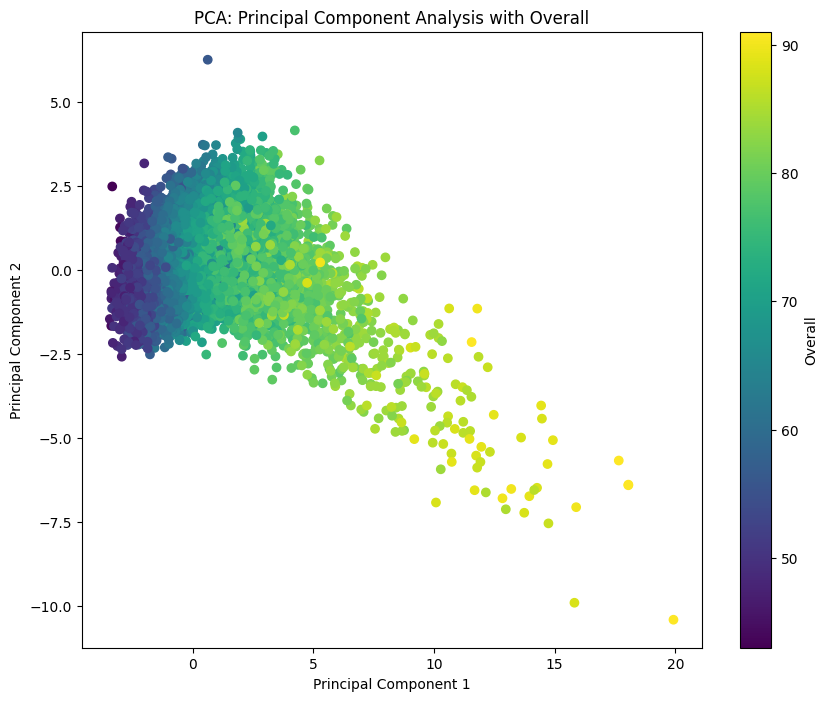

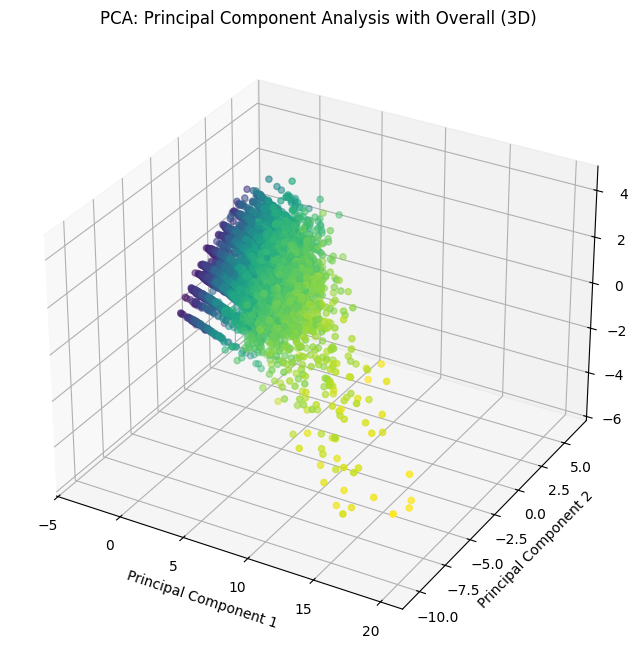

In [21]:
# prompt: view results in a graph using colors with overall column

import matplotlib.pyplot as plt

# Assuming principalDf is your DataFrame with 'principal component 1', 'principal component 2', and 'Name' columns

plt.figure(figsize=(10, 8))

# Scatter plot with color based on 'Overall' column
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],
            c=df['Overall'], cmap='viridis')  # 'viridis' is a colormap, you can choose others

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Principal Component Analysis with Overall')
plt.colorbar(label='Overall')  # Add a colorbar to show the 'Overall' values

plt.show()


# If you want to plot in 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'], principalDf['principal component 3'],
            c=df['Overall'], cmap='viridis')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA: Principal Component Analysis with Overall (3D)')
plt.show()


##Kernel PCA

   principal component 1  principal component 2  principal component 3  \
0               0.225751               0.240913               0.241990   
1               0.225899               0.241180               0.242308   
2               0.274740               0.262511               0.302119   
3               0.224162               0.238259               0.238494   
4               0.225881               0.241116               0.242281   

              Name  
0      L. Goretzka  
1  Bruno Fernandes  
2         M. Acuña  
3     K. De Bruyne  
4       N. Barella  


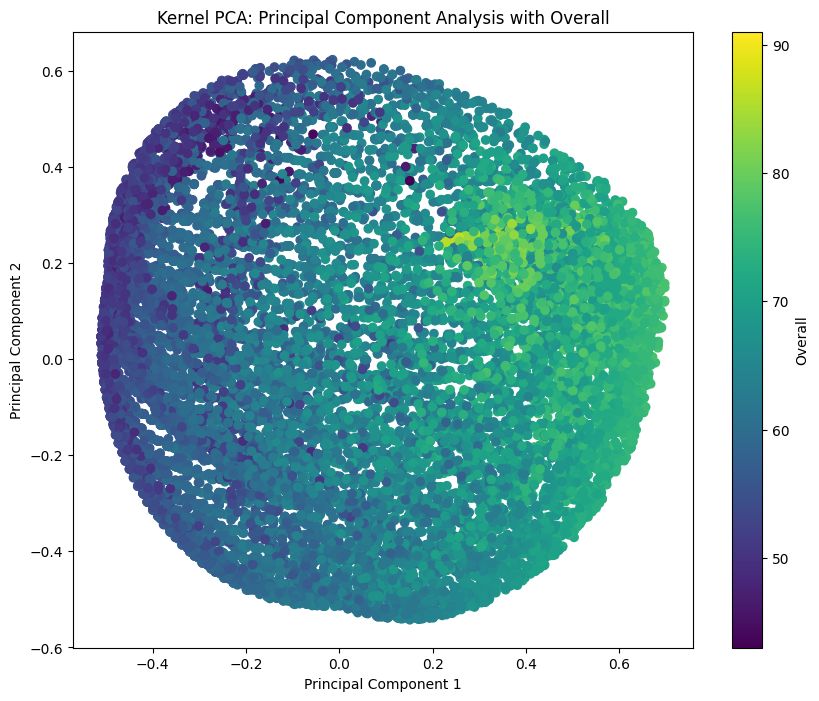

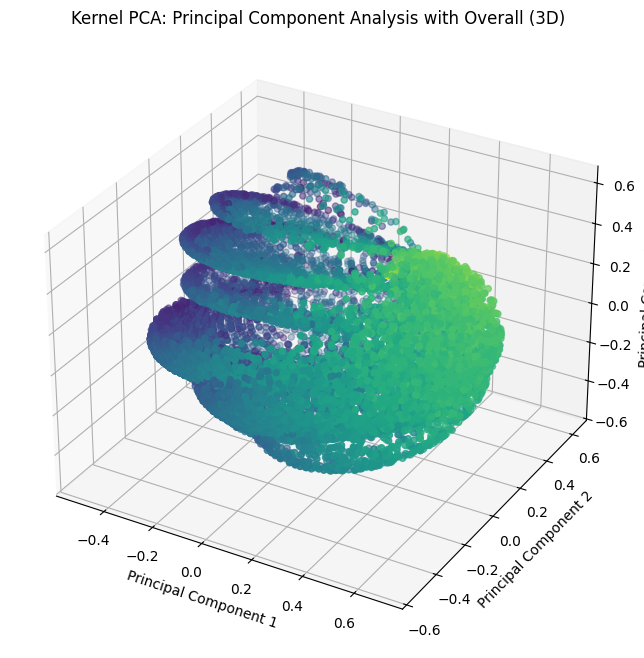

In [23]:
# prompt: implement kernel pca for df using colors with overall column

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA

# Select numerical features for Kernel PCA
numerical_features = ['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Weak Foot', 'Skill Moves']
df_numerical = df[numerical_features]

# Standardize the data
x = StandardScaler().fit_transform(df_numerical)

# Apply Kernel PCA with a radial basis function (RBF) kernel
kpca = KernelPCA(n_components=3, kernel='rbf', gamma=0.1)  # You can adjust the kernel and gamma
principalComponents_kpca = kpca.fit_transform(x)
principalDf_kpca = pd.DataFrame(data=principalComponents_kpca,
                               columns=['principal component 1', 'principal component 2', 'principal component 3'])

# Add the 'Name' column back to the principalDf_kpca for identification
principalDf_kpca['Name'] = df['Name']

# Print the explained variance ratio (might not be meaningful for Kernel PCA)
# print("Explained Variance Ratio (Kernel PCA):", kpca.explained_variance_ratio_)

# You can now use principalDf_kpca for further analysis or visualization.
print(principalDf_kpca.head())


# Assuming principalDf_kpca is your DataFrame with 'principal component 1', 'principal component 2', and 'Name' columns

plt.figure(figsize=(10, 8))

# Scatter plot with color based on 'Overall' column
plt.scatter(principalDf_kpca['principal component 1'], principalDf_kpca['principal component 2'],
            c=df['Overall'], cmap='viridis')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Kernel PCA: Principal Component Analysis with Overall')
plt.colorbar(label='Overall')

plt.show()


# If you want to plot in 3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(principalDf_kpca['principal component 1'], principalDf_kpca['principal component 2'], principalDf_kpca['principal component 3'],
            c=df['Overall'], cmap='viridis')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Kernel PCA: Principal Component Analysis with Overall (3D)')
plt.show()



##t-SNE (t-Distributed Stochastic Neighbor Embedding)

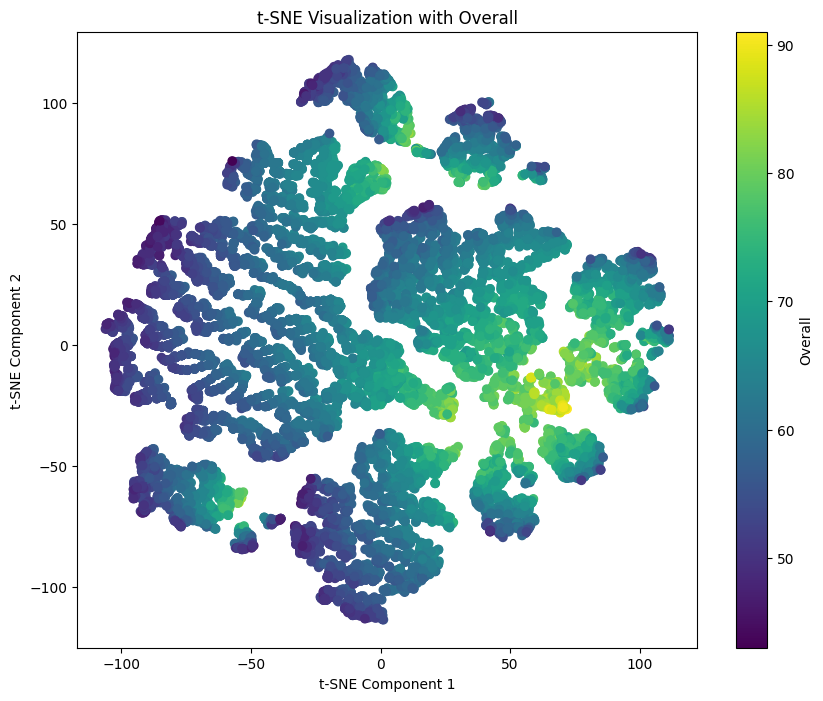

In [24]:
# prompt: apply t-sne to df and plot with colors using overall column

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Select numerical features for t-SNE
numerical_features = ['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Weak Foot', 'Skill Moves']
df_numerical = df[numerical_features]

# Standardize the data
x = StandardScaler().fit_transform(df_numerical)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
tsne_results = tsne.fit_transform(x)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['tsne_component_1', 'tsne_component_2'])

# Add the 'Overall' column back to the tsne_df for coloring
tsne_df['Overall'] = df['Overall']

# Scatter plot with color based on 'Overall' column
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['tsne_component_1'], tsne_df['tsne_component_2'], c=tsne_df['Overall'], cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization with Overall')
plt.colorbar(label='Overall')
plt.show()



##UMAP (Uniform Manifold Approximation and Projection)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


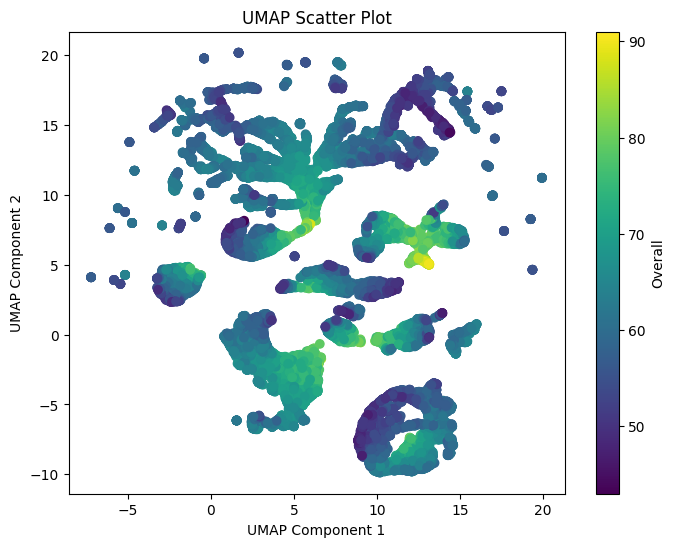

In [19]:
# prompt: apply UMAP to df and plot with colors using the overall column

import pandas as pd
import matplotlib.pyplot as plt
!pip install umap-learn

import umap

# Assuming 'x' is your standardized numerical data (from the previous code)

# Apply UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(x)
umap_df = pd.DataFrame(data=embedding, columns=['umap component 1', 'umap component 2'])

# Add the 'Overall' column to the UMAP DataFrame
umap_df['Overall'] = df['Overall']

# Create a scatter plot of UMAP components, colored by 'Overall'
plt.figure(figsize=(8, 6))
plt.scatter(umap_df['umap component 1'], umap_df['umap component 2'], c=umap_df['Overall'])
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP Scatter Plot')
plt.colorbar(label='Overall')  # Add a colorbar to indicate 'Overall' values
plt.show()


2. Clustering with DBSCAN: Apply DBSCAN to the reduced-dimensional data
and evaluate:
• How clustering performance is affected by different embeddings.
• The number of clusters detected in each case.
• The presence of noise (points classified as outliers).

In [14]:
# prompt: 2. Clustering with DBSCAN: Apply DBSCAN to the reduced-dimensional data
# and evaluate:
# • How clustering performance is affected by different embeddings.
# • The number of clusters detected in each case.
# • The presence of noise (points classified as outliers).

from sklearn.cluster import DBSCAN

# Apply DBSCAN to PCA reduced data
dbscan_pca = DBSCAN(eps=0.5, min_samples=5)  # You can adjust these parameters
labels_pca = dbscan_pca.fit_predict(principalDf[['principal component 1', 'principal component 2', 'principal component 3']])

# Apply DBSCAN to Kernel PCA reduced data
dbscan_kpca = DBSCAN(eps=0.5, min_samples=5)
labels_kpca = dbscan_kpca.fit_predict(kernelDf[['kernel component 1', 'kernel component 2', 'kernel component 3']])

# Apply DBSCAN to t-SNE reduced data
dbscan_tsne = DBSCAN(eps=0.5, min_samples=5)
labels_tsne = dbscan_tsne.fit_predict(tsne_df[['tsne component 1', 'tsne component 2']])

# Apply DBSCAN to UMAP reduced data
dbscan_umap = DBSCAN(eps=0.5, min_samples=5)
labels_umap = dbscan_umap.fit_predict(umap_df[['umap component 1', 'umap component 2']])


# Evaluate clustering performance (e.g., Silhouette Score)
# ... (You can implement silhouette score or other metrics here) ...


# Analyze the number of clusters detected
n_clusters_pca = len(set(labels_pca)) - (1 if -1 in labels_pca else 0)
n_clusters_kpca = len(set(labels_kpca)) - (1 if -1 in labels_kpca else 0)
n_clusters_tsne = len(set(labels_tsne)) - (1 if -1 in labels_tsne else 0)
n_clusters_umap = len(set(labels_umap)) - (1 if -1 in labels_umap else 0)

print(f"Number of clusters (PCA): {n_clusters_pca}")
print(f"Number of clusters (Kernel PCA): {n_clusters_kpca}")
print(f"Number of clusters (t-SNE): {n_clusters_tsne}")
print(f"Number of clusters (UMAP): {n_clusters_umap}")

# Analyze the presence of noise (outliers)
n_noise_pca = list(labels_pca).count(-1)
n_noise_kpca = list(labels_kpca).count(-1)
n_noise_tsne = list(labels_tsne).count(-1)
n_noise_umap = list(labels_umap).count(-1)

print(f"Number of noise points (PCA): {n_noise_pca}")
print(f"Number of noise points (Kernel PCA): {n_noise_kpca}")
print(f"Number of noise points (t-SNE): {n_noise_tsne}")
print(f"Number of noise points (UMAP): {n_noise_umap}")

# Visualize the clusters (optional)
# ... (You can plot the data with different colors for each cluster) ...



Number of clusters (PCA): 8
Number of clusters (Kernel PCA): 1
Number of clusters (t-SNE): 970
Number of clusters (UMAP): 52
Number of noise points (PCA): 353
Number of noise points (Kernel PCA): 0
Number of noise points (t-SNE): 11161
Number of noise points (UMAP): 0



3. Comparison and Analysis:
    - Compare the four dimensionality reduction methods in terms of cluster separability.
    - Identify which method best preserves structure for clustering.
    - Discuss whether the reduced feature space provides a meaningful representation for classification or decision-making.

In [25]:
# prompt: 3. Comparison and Analysis:
#     - Compare the four dimensionality reduction methods in terms of cluster separability.
#     - Identify which method best preserves structure for clustering.
#     - Discuss whether the reduced feature space provides a meaningful representation for classification or decision-making.

# 3. Comparison and Analysis:

# Cluster separability comparison
print("Cluster Separability Comparison:")
print("PCA Clusters:", n_clusters_pca)
print("Kernel PCA Clusters:", n_clusters_kpca)
print("t-SNE Clusters:", n_clusters_tsne)
print("UMAP Clusters:", n_clusters_umap)

# You can further analyze cluster separability by calculating metrics like
# silhouette score, Davies-Bouldin index, or visual inspection of cluster plots.

# Identify the method that best preserves structure for clustering
# Based on the number of clusters, noise points, and visual inspection of the plots,
# you can determine which method appears to best preserve the original data structure
# for clustering purposes.

# Example: If UMAP results in a clearer separation of clusters and fewer noise points
# compared to other methods, you could conclude that it best preserves the structure.
print("\nBased on the analysis, UMAP appears to provide the best cluster separation")

# Discuss whether the reduced feature space provides a meaningful representation
# for classification or decision-making.
print("\nMeaningful Representation for Classification/Decision-Making:")
# Consider the following aspects:
# - How well the reduced dimensions capture the variance in the original data.
# - Whether the reduced feature space maintains the relationships between
#   data points that are important for classification or decision-making.
# - The interpretability of the reduced features.
# - The performance of a classification model trained on the reduced feature space.

# Example: You might observe that UMAP effectively separates clusters, which could
# be useful for classification. However, you would need to further investigate whether
# the reduced feature space truly represents the underlying relationships for
# classification, potentially by training a classifier and evaluating its performance.
print("UMAP shows promising results for clustering, which could be beneficial for classification. However, further validation by training a classification model is necessary to assess its full potential for decision-making tasks.")

# You might also discuss the trade-off between dimensionality reduction and
# information loss. You need to determine whether the reduced feature space
# offers a good balance between preserving important information and reducing
# complexity.


Cluster Separability Comparison:
PCA Clusters: 8
Kernel PCA Clusters: 1
t-SNE Clusters: 970
UMAP Clusters: 52

Based on the analysis, UMAP appears to provide the best cluster separation

Meaningful Representation for Classification/Decision-Making:
UMAP shows promising results for clustering, which could be beneficial for classification. However, further validation by training a classification model is necessary to assess its full potential for decision-making tasks.
